<a href="https://colab.research.google.com/github/Rohan-69108/email-spam-vs-ham/blob/main/EMAIL_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data set/email.csv")

In [ ]:
df.head(6)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747
"{""mode"":""full""",1


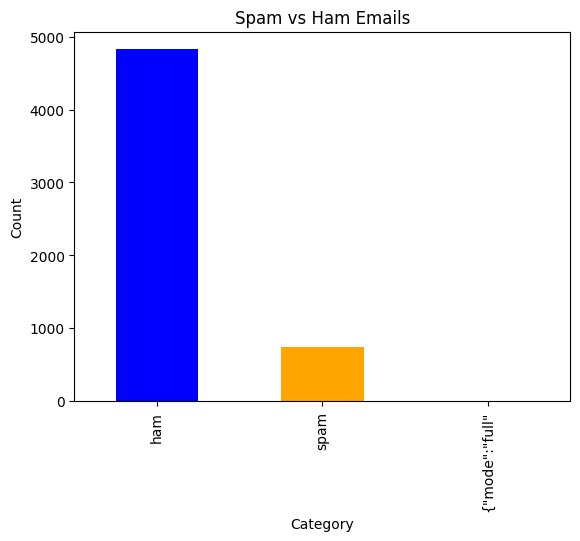

In [ ]:
df['Category'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Spam vs Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
tfidf_features = vectorizer.get_feature_names_out()
tfidf_features[:10]

array(['00', '000', '000pes', '008704050406', '0089', '0121',
       '01223585236', '01223585334', '02', '0207'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_clf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
rf_clf_scores.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


np.float64(0.9733053001363914)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
rf_clf_predictions = rf_clf.predict(X_test)
print(classification_report(y_test, rf_clf_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       958
        spam       1.00      0.85      0.92       157

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Data set/email.csv")

In [ ]:
df1.shape

(5573, 2)

In [ ]:
df1.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df1.duplicated().sum()

np.int64(415)

In [ ]:
df1 = df1.drop_duplicates()
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747
"{""mode"":""full""",1


In [ ]:
df1[df1['Category'] == '{"mode":"full"']

,Category,Message
5157,"{""mode"":""full""",isActive:false}


In [ ]:
# Drop row number 5572
df1.drop(df.index[5157], inplace=True)

# Reset index if needed
df1.reset_index(drop=True, inplace=True)
df1['Category'].value_counts()

,count
Category,
ham,4516
spam,641


In [ ]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['Category'] = le.fit_transform(df['Category'])
X = df['Message']
y = df['Category']

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# we have pre-clean and processed data.
## Still we will make it go through processing

# wordnet = WordNetLemmatizer()

stemmer = PorterStemmer()

corpus = []
for i in range(len(X)):
    review = re.sub('[^a-zA-Z]',' ',X[i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word)for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X = corpus
X = np.array(X)

In [ ]:
# Tokenize and Pad the Texts

# Tokenize text messages and pad them to a fixed length.

max_words = 10000
max_len = 25

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

In [ ]:
## DL

# Build the RNN Model


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Embedding layer: Converts tokens into dense vectors.
# SimpleRNN layer: Core RNN unit.
# Dense layer: Outputs a value between 0 and 1 for binary classification.

model = Sequential([
    Embedding(input_dim=max_words, output_dim=50, input_length=max_len),
    SimpleRNN(10, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

history = model.fit(X_train, y_train, epochs=20, batch_size=250, validation_split=0.1)

# Evaluate on Test Data

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6241 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8634 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8680 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8704 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8696 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8697 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8672 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8673 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━

In [ ]:
df1['Category'] = df1['Category'].map({'ham': 0, 'spam': 1})

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['Category'] = le.fit_transform(df['Category'])
X = df1['Message']
y = df1['Category']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform y_train and y_test (if they're still strings)
y_train = le.fit_transform(y_train)  # "ham" → 0, "spam" → 1
y_test = le.transform(y_test)        # Apply same encoding to test set

In [ ]:
y_train = np.where(y_train == "ham", 0, 1)
y_test = np.where(y_test == "ham", 0, 1)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1-Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Full classification report
print(classification_report(y_test, y_pred))

ValueError: Invalid dtype: str13184

In [ ]:
## LSTM
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

X = df['Message']
y = df['Category']

stemmer = PorterStemmer()

corpus = []
for i in range(len(X)):
    review = re.sub('[^a-zA-Z]',' ',X[i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word)for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

X = corpus
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)
max_len = 100  # or chosen by data exploration
train_pad = pad_sequences(train_seq, maxlen=max_len, padding='post', truncating='post')
test_pad = pad_sequences(test_seq, maxlen=max_len, padding='post', truncating='post')


# Build the LSTM Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_len),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Embedding: Turns word indices into dense vectors.

# LSTM: Captures sequential word patterns in messages.

# Dense: Converts features to binary output (spam/ham).


# Train the Model
history = model.fit(
    train_pad, y_train,  # X_train = train_pad
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
    ]
)


# Evaluate Performance
test_loss, test_acc = model.evaluate(test_pad, y_test)
print('Test Accuracy:', test_acc)

# Well-tuned LSTM models for spam/ham can achieve test accuracy over 97%.

# Key Tips

# Preprocessing: Remove stopwords, lower-case, and strip punctuation for best results.
# Hyperparameters: Adjust embedding size, LSTM units, max_len, batch size as needed.
# Libraries: Use callbacks like EarlyStopping to avoid overfitting.
# Metrics: For imbalanced datasets, monitor precision, recall, and F1 in addition to accuracy.

# This template is adaptable to SMS or email spam classification with state-of-the-art LSTM results using TensorFlow/Keras.

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8672 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8736 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8668 - loss: nan - val_accuracy: 0.8498 - val_loss: nan
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8419 - loss: nan
Test Accuracy: 0.8591928482055664
